<a href="https://colab.research.google.com/github/Adronz/Fungal-Proteomics/blob/main/Copy_of_Fungi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import sys
import gzip
import numpy as np
import pandas as pd
import urllib.request
!pip install umap-learn
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.2 MB/s eta 0:00:00


In [ ]:
#!/usr/bin/python3

import os
import sys
import gzip
import numpy as np
import pandas as pd

txipIn= "txip_fungi.npy"
txidxIn= "ipromerge_fungi.txt";
ipidxIn= "ipromerge_fungi.txt";

# interpro domain info
# https://ftp.ebi.ac.uk/pub/databases/interpro/current_release/entry.list

# tax id info ( ... with gzip.open(file_name, "rt") as ... )
#   proteomes_AND_proteome_type_1_AND_super_2023_09_20.tsv.gz
#   proteomes_AND_superkingdom_Bacteria_AND_2023_09_20.tsv.gz
#   proteomes_AND_Eucaryota_AND_super_2023_11_01.tsv.gz

txid = []
txidx = {}

ipid =[]
ipidx = {}

with open(txidxIn,"r") as fh:
    for ln in fh:
        if ln.startswith("tx:"):
            col = ln.strip().split()
            txid.append( col[1].strip() )
            txidx[ col[1].strip() ] = len(txid)-1

with open(ipidxIn,"r") as fh:
    for ln in fh:
        if ln.startswith("ipd:"):
            col = ln.strip().split()
            ipid.append(col[1].strip())
            ipidx[ col[1].strip() ] = len(ipid)-1

print( "tax:", len(txid), txid[:10] )
print( "dom:", len(ipid), ipid[:10] )

# numpy array
#------------

txip = np.load( txipIn )

print( txip.shape )
print( txip )
print( txip[:10,:10] )


# pandas dataframe
#-----------------

tipd = pd.DataFrame( txip, index= txidx, columns=ipidx )
print(tipd.shape)
print(tipd)

FileNotFoundError: [Errno 2] No such file or directory: 'ipromerge_fungi.txt'

In [ ]:
# TODO: not sure if this entry_list is right
entry_list = pd.read_csv(r'entry_list.txt', sep = '\t')
entry_list.head()

,ENTRY_AC,ENTRY_TYPE,ENTRY_NAME
0,IPR000126,Active_site,"Serine proteases, V8 family, serine active site"
1,IPR000138,Active_site,"Hydroxymethylglutaryl-CoA lyase, active site"
2,IPR000169,Active_site,"Cysteine peptidase, cysteine active site"
3,IPR000180,Active_site,"Membrane dipeptidase, active site"
4,IPR000189,Active_site,"Prokaryotic transglycosylase, active site"


In [ ]:
with gzip.open("proteomes_AND_Eucaryota_AND_super_2023_11_01.tsv.gz", 'r') as f:
    string_data = f.read().decode()
    list_data = [row.split("\t") for row in string_data.split("\n")]
    df_entries_eukaryota = pd.DataFrame(list_data[1:], columns=list_data[0])
#create df for all eukaryotes
#organism_organismid_df_archea = df_entries_archea.iloc[:, 1:3]
organism_organismid_df_eukaryota = pd.concat([df_entries_eukaryota['Organism Id'], df_entries_eukaryota['Organism']], axis=1)
df_entries_eukaryota.head()

,Proteome Id,Organism,Organism Id,Protein count,BUSCO,CPD,Taxon mnemonic,Taxonomic lineage
0,UP000002311,Saccharomyces cerevisiae (strain ATCC 204508 /...,559292,6060,"C:99.6%[S:97.4%,D:2.2%],F:0.1%,M:0.3%,n:2137",Outlier (high value),YEAST,"Eukaryota, Opisthokonta, Fungi, Dikarya, Ascom..."
1,UP000000589,Mus musculus (Mouse),10090,55087,"C:99.8%[S:51.2%,D:48.6%],F:0.0%,M:0.2%,n:13798",Outlier (high value),MOUSE,"Eukaryota, Opisthokonta, Metazoa, Eumetazoa, B..."
2,UP000000803,Drosophila melanogaster (Fruit fly),7227,22061,"C:100.0%[S:41.8%,D:58.2%],F:0.0%,M:0.0%,n:3285",Outlier (high value),DROME,"Eukaryota, Opisthokonta, Metazoa, Eumetazoa, B..."
3,UP000002494,Rattus norvegicus (Rat),10116,47942,"C:98.1%[S:45.5%,D:52.6%],F:0.3%,M:1.6%,n:13798",Outlier (high value),RAT,"Eukaryota, Opisthokonta, Metazoa, Eumetazoa, B..."
4,UP000005640,Homo sapiens (Human),9606,82678,"C:99.5%[S:37.4%,D:62.1%],F:0.0%,M:0.5%,n:13780",Outlier (high value),HUMAN,"Eukaryota, Opisthokonta, Metazoa, Eumetazoa, B..."


In [ ]:
df_entries_eukaryota.shape

(2241, 8)

In [ ]:
#get ids for all eukaryota in original table from tipd
row_names = list(tipd.index.values.tolist())

eukaryota_ids = df_entries_eukaryota['Organism Id']
eukaryota_ids = eukaryota_ids.to_list()
subset_ids_eukaryota = []
eukaryota = []
for i in range(len(row_names)):
    if row_names[i] in eukaryota_ids:
        subset_ids_eukaryota.append(i)
        eukaryota.append("Eukaryota")
    else: eukaryota.append("N/A")


print(eukaryota_ids)

['559292', '10090', '7227', '10116', '9606', '3702', '9913', '7955', '6239', '44689', '39947', '2715852', '64838', '284812', '237561', '35883', '3885', '436907', '7240', '6669', '104421', '644223', '9031', '5664', '227321', '237631', '284811', '284590', '284592', '43151', '1071378', '590646', '619300', '9669', '500485', '556484', '4558', '284813', '8090', '321614', '306901', '3068', '5786', '861557', '7222', '747676', '61853', '59463', '10029', '515849', '246410', '7238', '441960', '284591', '34765', '665079', '81824', '670386', '35128', '36329', '441375', '426418', '88036', '9595', '184922', '7739', '6945', '436017', '45351', '9601', '983644', '498257', '502780', '447093', '1064592', '9103', '28377', '402676', '441959', '332648', '367110', '9986', '46245', '240176', '564608', '771870', '294381', '5874', '379508', '294746', '296587', '554155', '559295', '294747', '559298', '3880', '336963', '502779', '214684', '5865', '432359', '322104', '9598', '9258', '13616', '9796', '353153', '7176

In [ ]:
print(None in eukaryota_ids)

True


In [ ]:
len(eukaryota_ids)

2241

In [ ]:
#global organism_organismid
organism_organismid = pd.DataFrame(organism_organismid_df_eukaryota)
organism_organismid.head()

,Organism Id,Organism
0,559292,Saccharomyces cerevisiae (strain ATCC 204508 /...
1,10090,Mus musculus (Mouse)
2,7227,Drosophila melanogaster (Fruit fly)
3,10116,Rattus norvegicus (Rat)
4,9606,Homo sapiens (Human)


In [ ]:
organism_organismid.shape

(2241, 2)

In [ ]:
eukaryota_ids = [str(i) for i in df_entries_eukaryota['Organism Id'].to_list()]
eukaryota_ids

['559292',
 '10090',
 '7227',
 '10116',
 '9606',
 '3702',
 '9913',
 '7955',
 '6239',
 '44689',
 '39947',
 '2715852',
 '64838',
 '284812',
 '237561',
 '35883',
 '3885',
 '436907',
 '7240',
 '6669',
 '104421',
 '644223',
 '9031',
 '5664',
 '227321',
 '237631',
 '284811',
 '284590',
 '284592',
 '43151',
 '1071378',
 '590646',
 '619300',
 '9669',
 '500485',
 '556484',
 '4558',
 '284813',
 '8090',
 '321614',
 '306901',
 '3068',
 '5786',
 '861557',
 '7222',
 '747676',
 '61853',
 '59463',
 '10029',
 '515849',
 '246410',
 '7238',
 '441960',
 '284591',
 '34765',
 '665079',
 '81824',
 '670386',
 '35128',
 '36329',
 '441375',
 '426418',
 '88036',
 '9595',
 '184922',
 '7739',
 '6945',
 '436017',
 '45351',
 '9601',
 '983644',
 '498257',
 '502780',
 '447093',
 '1064592',
 '9103',
 '28377',
 '402676',
 '441959',
 '332648',
 '367110',
 '9986',
 '46245',
 '240176',
 '564608',
 '771870',
 '294381',
 '5874',
 '379508',
 '294746',
 '296587',
 '554155',
 '559295',
 '294747',
 '559298',
 '3880',
 '336963',


In [ ]:
def extract_taxonomic_ranks(df, levels=5):
    # Split the 'Taxonomic lineage' by ', ' and expand to the desired number of columns
    tax_ranks = df['Taxonomic lineage'].str.split(', ', expand=True)

    # Ensure there are enough columns, filling with NA if necessary
    for _ in range(tax_ranks.shape[1], levels):
        tax_ranks[_] = np.nan  # Add a new column filled with NaNs

    # Take only the first `levels` columns
    tax_ranks = tax_ranks.iloc[:, :levels]

    # Name the columns appropriately
    tax_ranks.columns = ['Domain', 'Phylum', 'Class', 'Order', 'Family']

    # Replace empty strings with NaN
    tax_ranks.replace('', np.nan, inplace=True)

    # Set the "Organism Id" as the index
    tax_ranks.index = df['Organism Id']

    return tax_ranks

archaea_tax_ranks = extract_taxonomic_ranks(df_entries_eukaryota)
bacteria_tax_ranks = extract_taxonomic_ranks(df_entries_eukaryota)

df_combined = pd.concat([archaea_tax_ranks, bacteria_tax_ranks], ignore_index=False)
df_combined = df_combined[~df_combined.index.isna()]
df_combined = df_combined[df_combined.index.isin(tipd.index)]
df_combined

,Domain,Phylum,Class,Order,Family
Organism Id,,,,,
559292,Eukaryota,Opisthokonta,Fungi,Dikarya,Ascomycota
284812,Eukaryota,Opisthokonta,Fungi,Dikarya,Ascomycota
237561,Eukaryota,Opisthokonta,Fungi,Dikarya,Ascomycota
436907,Eukaryota,Opisthokonta,Fungi,Dikarya,Ascomycota
644223,Eukaryota,Opisthokonta,Fungi,Dikarya,Ascomycota
...,...,...,...,...,...
4874,Eukaryota,Opisthokonta,Fungi,Fungi incertae sedis,Mucoromycota
980116,Eukaryota,Opisthokonta,Fungi,Dikarya,Basidiomycota
2733690,Eukaryota,Opisthokonta,Fungi,Dikarya,Basidiomycota


/Users/siddharth/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


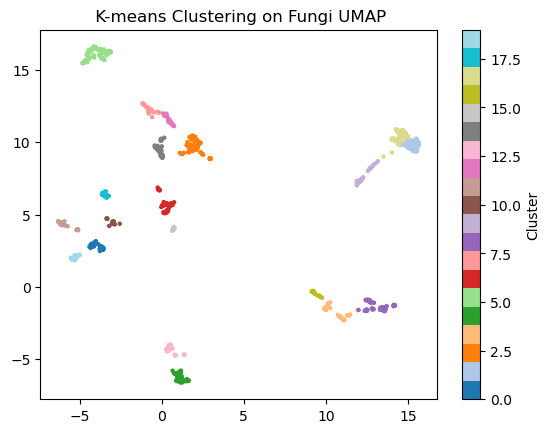

In [ ]:
from umap import UMAP
from sklearn.cluster import KMeans

umap_reducer = UMAP()
umap_embedding = umap_reducer.fit_transform(tipd.loc[:, tipd.columns != 'Taxonomic lineage'])

# Apply KMeans clustering on the UMAP-reduced data
kmeans = KMeans(n_clusters=20)
kmeans.fit(umap_embedding)

plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=kmeans.labels_, cmap='tab20', s=5)
centers = kmeans.cluster_centers_
plt.title(' K-means Clustering on Fungi UMAP')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
cluster_labels = kmeans.labels_
cluster_labels

array([ 4,  9, 14, 16, 13, 13,  2,  5,  5, 12,  5,  5,  5,  6,  4,  4,  4,
        5,  2,  5,  0,  4,  4,  2,  0,  6,  2,  5,  5,  3,  2, 13,  5,  2,
       18,  4,  4,  2,  4, 18,  5, 13,  1,  1,  0,  7,  5, 18,  5,  0,  5,
        5, 13,  1, 14,  0,  8,  8, 18,  4,  4, 18, 18, 18, 18, 18, 18, 18,
       19,  2, 13, 13, 13,  5,  5, 18, 13, 13,  7,  7,  2, 18,  2,  1, 14,
        0, 10,  8,  7, 17,  8,  6,  9,  7,  9, 12,  9,  9, 10,  3,  9, 13,
        5,  1,  1,  7, 13, 14,  6,  0, 18,  8,  2,  5,  5, 14,  5,  5,  2,
        5, 14,  7,  5,  2,  2,  1,  8,  8,  6,  5,  2,  6,  7,  9,  5, 14,
       14,  4,  4,  4,  2,  8,  5,  4,  6,  5,  5,  8,  6,  3,  7, 10,  2,
       18,  2,  2, 18, 12,  1,  7,  4,  4, 13, 13,  4,  4,  5, 14,  3,  3,
        0, 12,  8,  4,  5, 19, 13,  2, 19, 14, 17, 17,  6,  3,  2, 13, 16,
        7, 17, 17,  7,  4,  3,  0,  0, 18, 13, 17, 14,  5,  5,  2,  7,  9,
       14,  9,  5, 17,  5,  3, 17,  2, 19,  5, 17, 14,  4,  1, 17,  1,  6,
        1,  1,  5,  5,  7

In [ ]:
cluster_percentage = {}
for cluster_label in np.unique(cluster_labels):
    cluster_indices = np.where(cluster_labels == cluster_label)[0]
    cluster_data = tipd.iloc[cluster_indices]
    total_samples_in_cluster = len(cluster_data)
    feature_counts = cluster_data['Family'].value_counts()
    feature_percentages = (feature_counts / total_samples_in_cluster) * 100
    cluster_percentage[cluster_label] = feature_percentages

# Step 4: Create a table to display percentages
table_data = []
for cluster_label, percentages in cluster_percentage.items():
    for feature_value, percentage in percentages.items():
        table_data.append([cluster_label, feature_value, percentage])

table_columns = ['Cluster', 'Taxon', 'Percentage']
percentage_table = pd.DataFrame(table_data, columns=table_columns)
percentage_table

NameError: name 'np' is not defined